# Tesla Stock Price Prediction - Data Cleaning & EDA

## Objective
- Load and explore the Tesla stock price dataset
- Handle missing values appropriately for time-series data
- Perform exploratory data analysis and visualization

## 1. Load Dataset

In [1]:
%pip install  numpy, pandas, scikit-learn, tensorflow, keras-tuner, matplotlib, seaborn, jupyter, ipykernel, joblib, python-dateutil
%pip install seaborn
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set project root
PROJECT_ROOT = Path('..').resolve()
DATA_PATH = PROJECT_ROOT / 'data' / 'raw' / 'TSLA.csv'

# Load dataset
df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head(10)

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'numpy,'

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Dataset shape: (2416, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


## 2. Data Types & Missing Values

In [3]:
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Duplicate Dates:")
print(df.duplicated(subset=['Date']).sum())

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   str    
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), str(1)
memory usage: 132.3 KB

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Dates:
0


## 3. Handling Missing Values (Time-Series Specific)

**For time-series data, we handle missing values differently:**
- **Forward fill (ffill)**: Use previous day's value - preserves temporal order
- **Backward fill (bfill)**: Use next day's value - for gaps at end
- **Interpolation**: Linear interpolation between known values - smooth for small gaps
- **Avoid**: Drop rows - removes temporal continuity, breaks sequences

In [4]:
# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.sort_index()

# Handle missing values - use forward fill for time-series (preserves temporal order)
print("Before handling missing values:")
print(df.isnull().sum())

df_clean = df.copy()
# Forward fill for any missing values (handles stock market holidays)
df_clean = df_clean.ffill()
# Backward fill for any leading NaN
df_clean = df_clean.bfill()

print("\nAfter handling missing values:")
print(df_clean.isnull().sum())
print("\nDataset after cleaning:")
df_clean.head()

Before handling missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

After handling missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Dataset after cleaning:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## 4. Data Visualization

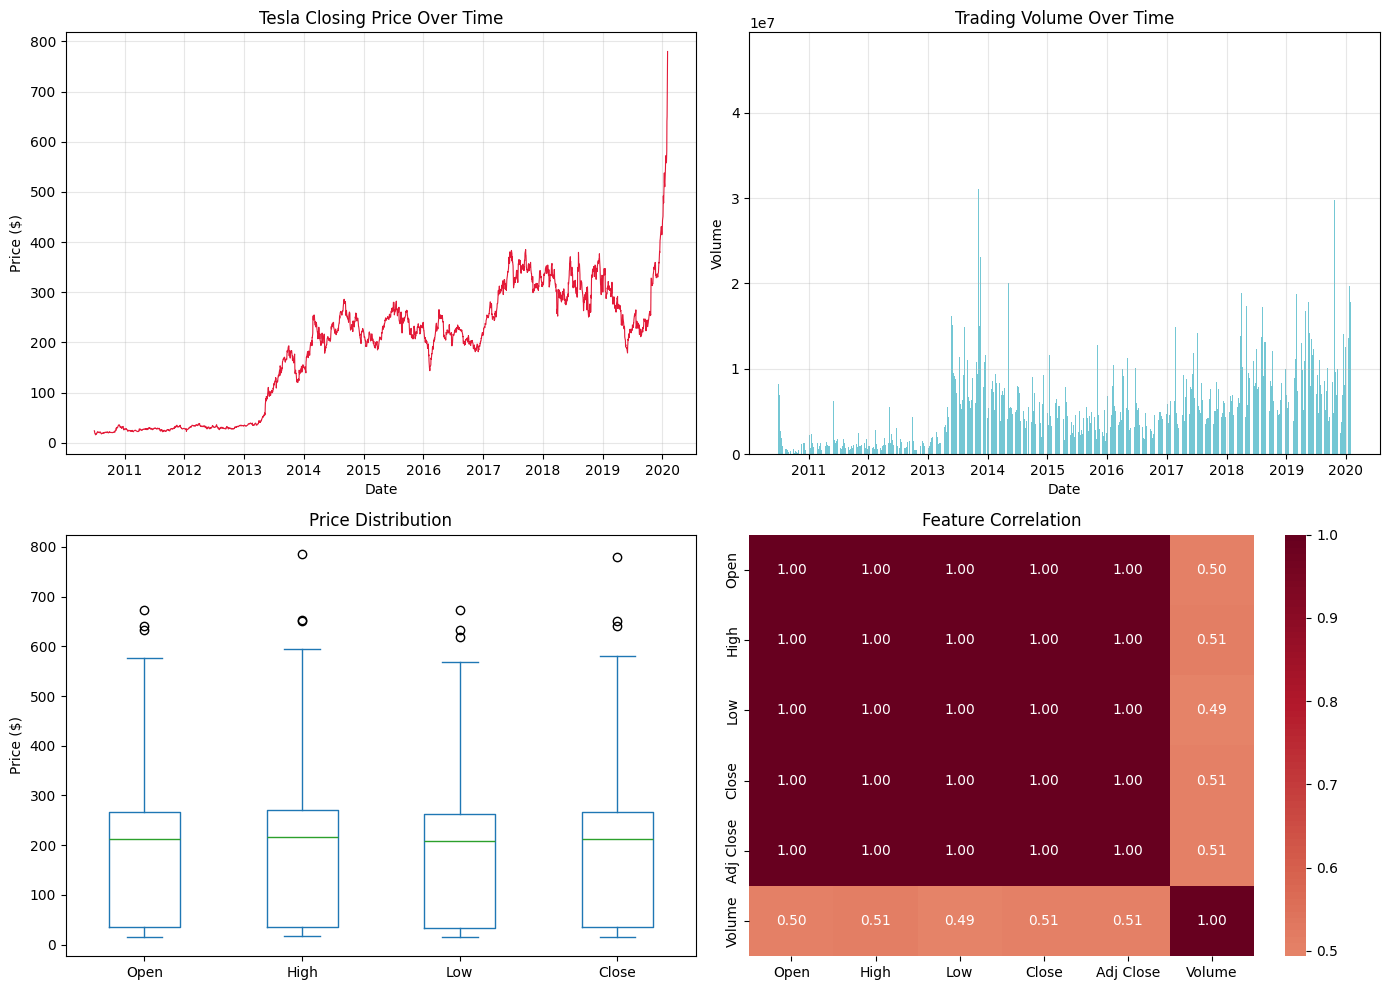

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Closing Price Over Time
axes[0, 0].plot(df_clean.index, df_clean['Close'], color='#E31937', linewidth=0.8)
axes[0, 0].set_title('Tesla Closing Price Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# Volume Over Time
axes[0, 1].bar(df_clean.index, df_clean['Volume'], color='#17A2B8', alpha=0.6, width=1)
axes[0, 1].set_title('Trading Volume Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

# Price Distribution (High, Low, Close)
df_clean[['Open', 'High', 'Low', 'Close']].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution')
axes[1, 0].set_ylabel('Price ($)')

# Correlation Heatmap
sns.heatmap(df_clean.corr(), annot=True, cmap='RdBu_r', center=0, ax=axes[1, 1], fmt='.2f')
axes[1, 1].set_title('Feature Correlation')

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'notebooks' / 'eda_visualizations.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Statistical Summary

In [6]:
print("Statistical Summary:")
df_clean.describe()

Statistical Summary:


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
# Save cleaned data for feature engineering
df_clean.to_csv(PROJECT_ROOT / 'data' / 'processed' / 'tsla_cleaned.csv')
print("Cleaned data saved to data/processed/tsla_cleaned.csv")

Cleaned data saved to data/processed/tsla_cleaned.csv
